/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4620 - loss: 1.1653 - val_accuracy: 0.6031 - val_loss: 0.7915
Epoch 2/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5668 - loss: 0.8907 - val_accuracy: 0.6258 - val_loss: 0.7544
Epoch 3/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5872 - loss: 0.8378 - val_accuracy: 0.6531 - val_loss: 0.7418
Epoch 4/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6131 - loss: 0.8090 - val_accuracy: 0.6543 - val_loss: 0.7273
Epoch 5/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6270 - loss: 0.7804 - val_accuracy: 0.6694 - val_loss: 0.7064
Epoch 6/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6492 - loss: 0.7561 - val_accuracy: 0.6827 - val_loss: 0.6762
Epoch 7/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6550 - loss: 0.7414 - val_accuracy: 0.6955 - val_loss: 0.6753
Epoch 8/200
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6532 - loss: 0.7278 - val_acc

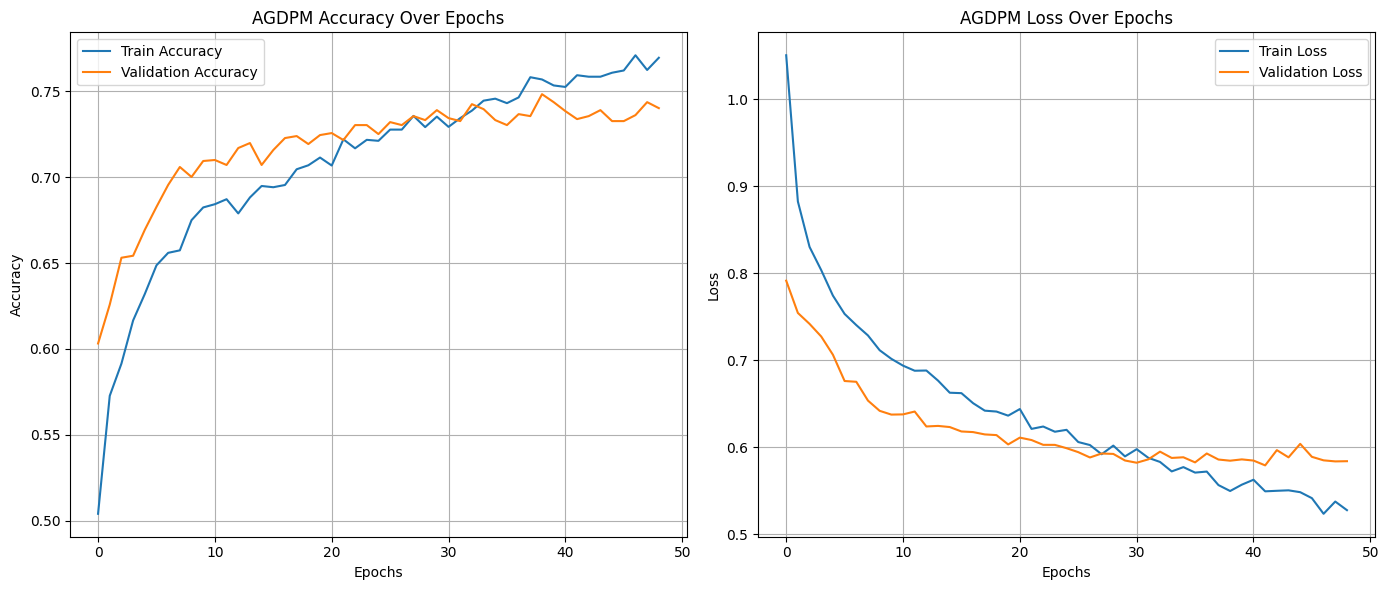


Random Forest Accuracy: 0.7141
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.70       573
           1       0.84      0.89      0.86       574
           2       0.68      0.45      0.55       574

    accuracy                           0.71      1721
   macro avg       0.72      0.71      0.70      1721
weighted avg       0.72      0.71      0.70      1721

Confusion Matrix:
 [[456  29  88]
 [ 29 512  33]
 [241  72 261]]

SVM Accuracy: 0.6868
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.73      0.66       573
           1       0.80      0.89      0.84       574
           2       0.64      0.44      0.52       574

    accuracy                           0.69      1721
   macro avg       0.68      0.69      0.68      1721
weighted avg       0.68      0.69      0.68      1721

Confusion Matrix:
 [[421  43 109]
 [ 35 509  30]
 [240  82 252]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.7066
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       573
           1       0.85      0.90      0.88       574
           2       0.63      0.51      0.56       574

    accuracy                           0.71      1721
   macro avg       0.70      0.71      0.70      1721
weighted avg       0.70      0.71      0.70      1721

Confusion Matrix:
 [[408  26 139]
 [ 22 518  34]
 [220  64 290]]

Gradient Boosting Accuracy: 0.6903
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.78      0.69       573
           1       0.80      0.86      0.83       574
           2       0.64      0.43      0.51       574

    accuracy                           0.69      1721
   macro avg       0.69      0.69      0.68      1721
weighted avg       0.69      0.69      0.68      1721

Confusion Matrix:
 [[448  30  95]
 [ 33 496  45]
 [236  94 244]

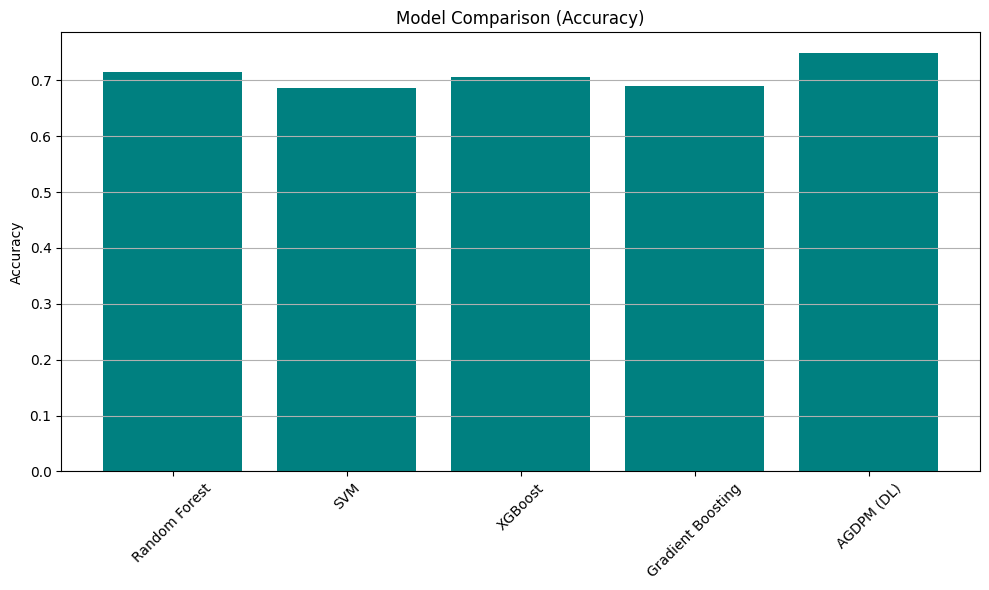

In [1]:
# AGDPM: Enhanced Genome Disorder Prediction with Optimization

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, Softmax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# === Load Dataset ===
data = pd.read_csv("train.csv")

# === Data Cleaning ===
data.replace(['-99', -99], np.nan, inplace=True)
data.dropna(inplace=True)
data.drop(['Patient Id', 'Disorder Subclass'], axis=1, inplace=True)

# === Label Encoding for Categorical Columns ===
categorical_cols = data.select_dtypes(include='object').columns
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

# === Features and Labels ===
X = data.drop('Genetic Disorder', axis=1)
y = data['Genetic Disorder']
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# === Handle Class Imbalance ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# === Normalize Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# === One-hot encode target for DL ===
y_cat = to_categorical(y_resampled)

# === Train/Test Split ===
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

# === AGDPM Model with Enhancements ===
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))

model.add(Dense(3))
model.add(Softmax())

# === Compile and Train Model ===
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

# === Evaluate DL Model ===
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

print("\nAGDPM Final Accuracy:", accuracy_score(y_val_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_val_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_val_classes, y_pred_classes))

# === Accuracy and Loss Graphs ===
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AGDPM Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('AGDPM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# === Classical ML Models for Comparison ===
X_train_ml, X_val_ml, y_train_ml, y_val_ml = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, random_state=42)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train_ml, y_train_ml)
    preds = clf.predict(X_val_ml)
    acc = accuracy_score(y_val_ml, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_val_ml, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_val_ml, preds))

# === Compare All Models ===
results['AGDPM (DL)'] = accuracy_score(y_val_classes, y_pred_classes)

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='teal')
plt.ylabel('Accuracy')
plt.title('Model Comparison (Accuracy)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()